# Allanvariance Analysis for IMU sensor

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import allantools as alv
import math

In [2]:
stat_acc_df = pd.read_csv("../data/stationary_acc.csv")
stat_gyr_df = pd.read_csv("../data/stationary_gyr.csv")
traj_acc_df = pd.read_csv("../data/traj_acc.csv")
traj_gyr_df = pd.read_csv("../data/traj_gyr.csv")
traj_gps_df = pd.read_csv("../data/traj_gps.csv")
traj_truth_df = pd.read_csv("../data/traj_truth.csv")

## Plotting Alan Divaitions for Accelerometer's Y-Axis

In [5]:
stat_acc_df.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.069651,0.080758,-0.120838,9.752547
1,0.119651,0.085543,-0.101695,9.756734
2,0.169651,0.090329,-0.106481,9.747163
3,0.219651,0.066401,-0.105882,9.766306
4,0.269651,0.080758,-0.111266,9.751948


In [17]:
accel_yaxis_vec = stat_acc_df.loc[:, 'Acceleration y (m/s^2)'].to_numpy()
accel_yaxis_vec = accel_yaxis_vec.reshape(accel_yaxis_vec.shape[0], 1)

In [ ]:
accel_yaxis_vec

array([[-0.12083755],
       [-0.10169496],
       [-0.10648061],
       ...,
       [-0.10947163],
       [-0.15732808],
       [-0.35712877]])

In [ ]:
type(accel_yaxis_vec)

numpy.ndarray

In [ ]:
accel_yaxis_vec.shape

(50208, 1)

In [26]:
accel_time_vec = stat_acc_df.loc[:, 'Time (s)'].to_numpy()
accel_time_vec = accel_time_vec.reshape(accel_time_vec.shape[0], 1)
accel_time_vec, accel_time_vec.shape

(array([[6.96510810e-02],
        [1.19651081e-01],
        [1.69651081e-01],
        ...,
        [2.51031965e+03],
        [2.51036965e+03],
        [2.51041965e+03]]),
 (50208, 1))

In [28]:
for i in range(accel_time_vec.shape[0]):
    if i == accel_time_vec.shape[0] - 1:
        continue
    print(f"delta: {accel_time_vec[i+1] -accel_time_vec[i]}")

delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta: [0.05]
delta:

In [36]:
accel_sampling_rate = float((accel_time_vec[1] - accel_time_vec[0])[0])
accel_sampling_freq = 1. / accel_sampling_rate
f"{accel_sampling_rate}s, {accel_sampling_freq}Hz" 

'0.05s, 20.0Hz'

In [34]:
alv.oadev(accel_yaxis_vec, rate=accel_sampling_rate)

(array([2.0000e+01, 4.0000e+01, 8.0000e+01, 1.6000e+02, 3.2000e+02,
        6.4000e+02, 1.2800e+03, 2.5600e+03, 5.1200e+03, 1.0240e+04,
        2.0480e+04, 4.0960e+04, 8.1920e+04, 1.6384e+05, 3.2768e+05]),
 array([7.25830157e-04, 3.81218905e-04, 2.08297987e-04, 9.69743245e-05,
        5.11654548e-05, 2.29807828e-05, 1.14121472e-05, 5.78121796e-06,
        2.95180968e-06, 1.45093812e-06, 7.28822091e-07, 3.65140014e-07,
        1.84151795e-07, 9.28601956e-08, 4.76813387e-08]),
 array([3.23934495e-06, 1.70139546e-06, 9.29679415e-07, 4.32852084e-07,
        2.28417209e-07, 1.02625511e-07, 5.09958932e-08, 2.58668117e-08,
        1.32412088e-08, 6.54239811e-09, 3.32107198e-09, 1.70040529e-09,
        8.98397644e-10, 5.04913649e-10, 3.61056527e-10]),
 array([50206., 50204., 50200., 50192., 50176., 50144., 50080., 49952.,
        49696., 49184., 48160., 46112., 42016., 33824., 17440.]))

In [35]:
alv.oadev(accel_yaxis_vec)

(array([1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02, 5.1200e+02,
        1.0240e+03, 2.0480e+03, 4.0960e+03, 8.1920e+03, 1.6384e+04]),
 array([1.45166031e-02, 7.62437810e-03, 4.16595974e-03, 1.93948649e-03,
        1.02330910e-03, 4.59615657e-04, 2.28242943e-04, 1.15624359e-04,
        5.90361935e-05, 2.90187624e-05, 1.45764418e-05, 7.30280027e-06,
        3.68303590e-06, 1.85720391e-06, 9.53626774e-07]),
 array([6.47868990e-05, 3.40279091e-05, 1.85935883e-05, 8.65704168e-06,
        4.56834418e-06, 2.05251021e-06, 1.01991786e-06, 5.17336235e-07,
        2.64824177e-07, 1.30847962e-07, 6.64214396e-08, 3.40081058e-08,
        1.79679529e-08, 1.00982730e-08, 7.22113053e-09]),
 array([50206., 50204., 50200., 50192., 50176., 50144., 50080., 49952.,
        49696., 49184., 48160., 46112., 42016., 33824., 17440.]))

In [141]:
tau, ad, _, _ = alv.oadev(accel_yaxis_vec, rate=accel_sampling_freq, taus="decade")
tau, ad, type(tau), type(ad)

(array([5.e-02, 1.e-01, 2.e-01, 5.e-01, 1.e+00, 2.e+00, 5.e+00, 1.e+01,
        2.e+01, 5.e+01, 1.e+02, 2.e+02, 5.e+02, 1.e+03]),
 array([2.90332063e-01, 1.52487562e-01, 8.33191949e-02, 3.07006595e-02,
        1.51363831e-02, 7.42897303e-03, 3.11986177e-03, 1.45655115e-03,
        7.45838634e-04, 3.01390066e-04, 1.48809045e-04, 7.50205289e-05,
        3.04609454e-05, 1.49526281e-05]),
 numpy.ndarray,
 numpy.ndarray)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/y4/9flb_gwd6vzf86ds_bx5ydkc0000gn/T/ipykernel_99801/1079166256.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\sigma$")


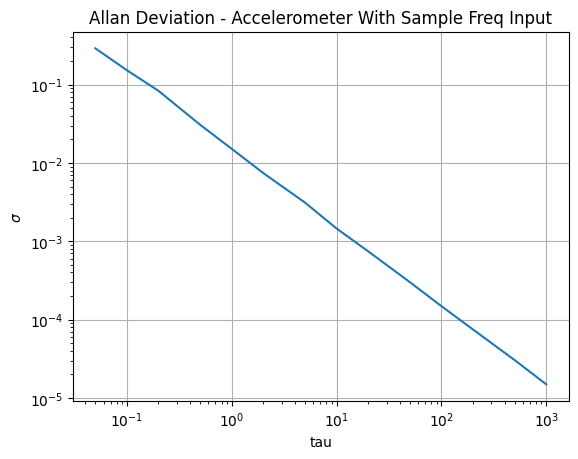

In [142]:
plt.loglog(tau, ad)
plt.title("Allan Deviation - Accelerometer With Sample Freq Input")
plt.ylabel("$\sigma$")
plt.xlabel("tau")
plt.grid(visible=True)

In [143]:
len(tau), len(ad)

(14, 14)

In [113]:
# Compute slope.
i0 = len(tau) // 2
i1 = len(tau) - 1
i0, i1

(7, 14)

In [114]:
tau1 = tau[i1]
tau0 = tau[i0]
ad1 = ad[i1]
ad0 = ad[i0]
(tau1, tau0), (ad1, ad0)

((np.float64(819.2), np.float64(6.4)),
 (np.float64(1.9072535478182154e-05), np.float64(0.00231248718206676)))

In [115]:
tau1 = math.log10(tau1)
tau0 = math.log10(tau0)
ad1 = math.log10(ad1)
ad0 = math.log10(ad0)
tau1, tau0, ad1, ad0

(2.9133899436317554,
 0.8061799739838872,
 -4.71959156856973,
 -2.6359206658421637)

In [116]:
m = (ad1 - ad0) / (tau1 - tau0)
m

-0.9888292731814309

In [128]:
def find_log_slope(ydat, xdat):
    assert len(ydat) == len(xdat)
    i0 = len(ydat) // 2
    i1 = len(ydat) - 1
    y1 = ydat[i1]
    y0 = ydat[i0]
    x1 = xdat[i1]
    x0 = xdat[i0]
    y1log = math.log10(y1)
    y0log = math.log10(y0)
    x1log = math.log10(x1)
    x0log = math.log10(x0)
    return (y1log - y0log) / (x1log - x0log)

In [147]:
tau, ad, _, _ = alv.oadev(accel_yaxis_vec, rate=accel_sampling_freq, taus="octave")
find_log_slope(ad, tau)

-0.9888292731814309

In [122]:
tau, ad, _, _ = alv.oadev(accel_yaxis_vec)
find_log_slope(ad, tau)

-0.9888292731814309

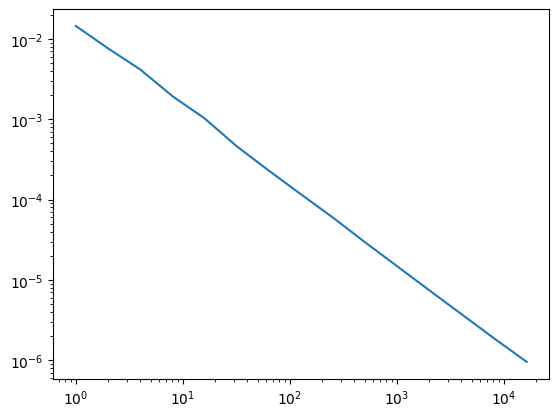

In [76]:
plt.loglog(tau, ad)

In [77]:
m = (ad[i1] - ad[i0]) / (tau[i1] - tau[i0])
m

np.float64(-7.054055876564278e-09)

## Plotting Alan Divaitions for Gyro's Z-Axis

In [51]:
stat_gyr_df.head()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,0.084551,0.000611,0.000764,-0.000305
1,0.134551,-0.003054,0.000764,-0.000305
2,0.184551,-0.001833,0.000764,-0.000305
3,0.234551,-0.000611,-0.000458,-0.000305
4,0.284551,0.001833,0.000764,-0.000305


In [61]:
gyro_zaxis_vec = stat_gyr_df.loc[:, 'Gyroscope z (rad/s)'].to_numpy()
gyro_zaxis_vec = gyro_zaxis_vec.reshape(gyro_zaxis_vec.shape[0], 1)

In [62]:
gyro_zaxis_vec

array([[-0.00030543],
       [-0.00030543],
       [-0.00030543],
       ...,
       [-0.00106901],
       [ 0.00488692],
       [ 0.02092214]])

In [63]:
gyro_time_vec = stat_gyr_df.loc[:, 'Time (s)'].to_numpy()
gyro_time_vec = accel_time_vec.reshape(gyro_time_vec.shape[0], 1)
gyro_time_vec, gyro_time_vec.shape

(array([[6.96510810e-02],
        [1.19651081e-01],
        [1.69651081e-01],
        ...,
        [2.51031965e+03],
        [2.51036965e+03],
        [2.51041965e+03]]),
 (50208, 1))

In [64]:
gyro_sampling_rate = float((gyro_time_vec[1] - gyro_time_vec[0])[0])
gyro_sampling_freq = 1. / gyro_sampling_rate
f"{gyro_sampling_rate}s, {gyro_sampling_freq}Hz" 

'0.05s, 20.0Hz'

In [123]:
tau, ad, _, _ = alv.oadev(gyro_zaxis_vec, rate=gyro_sampling_freq)
tau, ad

(array([5.000e-02, 1.000e-01, 2.000e-01, 4.000e-01, 8.000e-01, 1.600e+00,
        3.200e+00, 6.400e+00, 1.280e+01, 2.560e+01, 5.120e+01, 1.024e+02,
        2.048e+02, 4.096e+02, 8.192e+02]),
 array([2.43596953e-02, 1.22820658e-02, 6.09222791e-03, 3.08333484e-03,
        1.53106489e-03, 7.66172662e-04, 3.82228587e-04, 1.91460102e-04,
        9.55716747e-05, 4.78868354e-05, 2.39469681e-05, 1.19127230e-05,
        5.97701460e-06, 2.95008513e-06, 1.47578194e-06]))

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/y4/9flb_gwd6vzf86ds_bx5ydkc0000gn/T/ipykernel_99801/2333962753.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\sigma$")


Text(0.5, 0, 'tau')

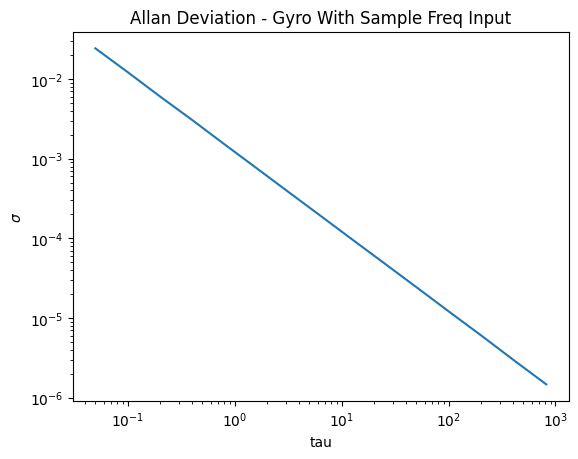

In [124]:
plt.loglog(tau, ad)
plt.title("Allan Deviation - Gyro With Sample Freq Input")
plt.ylabel("$\sigma$")
plt.xlabel("tau")

In [125]:
find_log_slope(ad, tau)

-1.0027743445708581

## Analyse How Tool Works with White Noise

In [151]:
x = alv.noise.white(10000)
(taus, adevs, errors, ns) = alv.oadev(x)
taus, adevs, taus.shape, adevs.shape

(array([1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01,
        6.400e+01, 1.280e+02, 2.560e+02, 5.120e+02, 1.024e+03, 2.048e+03,
        4.096e+03]),
 array([1.21142266e+00, 6.07745867e-01, 3.02327067e-01, 1.51739265e-01,
        7.60924737e-02, 3.83164091e-02, 1.90875523e-02, 9.50536104e-03,
        4.76218621e-03, 2.38689686e-03, 1.19813763e-03, 5.90244328e-04,
        3.06524019e-04]),
 (13,),
 (13,))

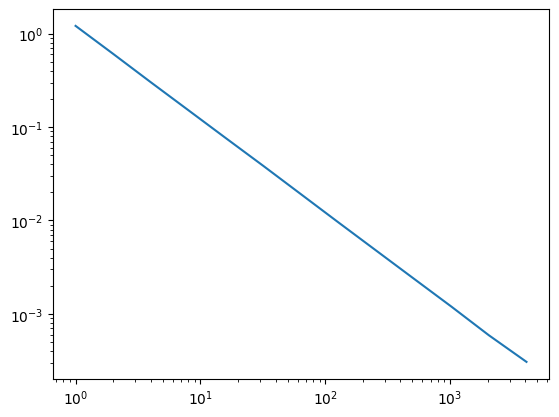

In [ ]:
plt.loglog(taus, adevs)

In [ ]:
find_log_slope(adevs, taus)

-0.9934146954418834

In [154]:
x = alv.noise.white(10000)
(taus, adevs, errors, ns) = alv.oadev(x, taus="octave")
taus, adevs, taus.shape, adevs.shape

(array([1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01,
        6.400e+01, 1.280e+02, 2.560e+02, 5.120e+02, 1.024e+03, 2.048e+03,
        4.096e+03]),
 array([1.19552030e+00, 6.20491595e-01, 3.03380507e-01, 1.53695048e-01,
        7.64653296e-02, 3.88064160e-02, 1.89287278e-02, 9.64632594e-03,
        4.76398452e-03, 2.39014369e-03, 1.18777674e-03, 6.02226237e-04,
        2.98394836e-04]),
 (13,),
 (13,))

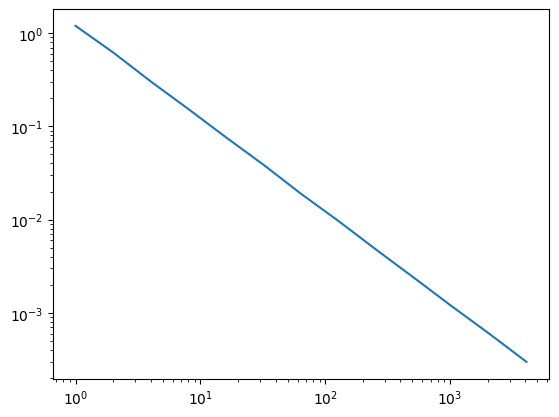

In [155]:
plt.loglog(taus, adevs)

In [ ]:
find_log_slope(adevs, taus)

-0.9978685117897605

In [157]:
x = alv.noise.white(10000)
(taus, adevs, errors, ns) = alv.oadev(x, taus="all")
taus, adevs, taus.shape, adevs.shape

(array([1.000e+00, 2.000e+00, 3.000e+00, ..., 4.997e+03, 4.998e+03,
        4.999e+03]),
 array([1.22462147e+00, 5.99966833e-01, 4.08675601e-01, ...,
        1.34414710e-04, 1.66857260e-04, 1.08221265e-04]),
 (4999,),
 (4999,))

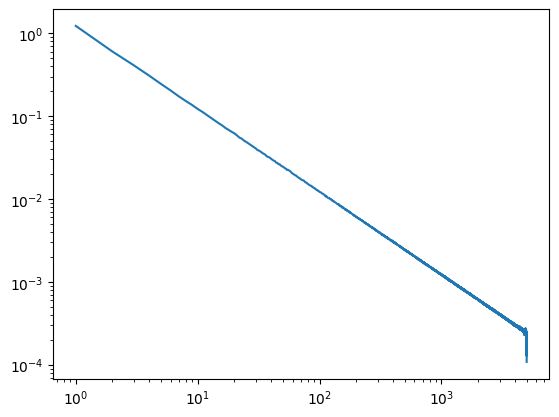

In [158]:
plt.loglog(taus, adevs)

In [159]:
find_log_slope(adevs, taus)

-2.185727807912131